# Complex models for continuous outcomes. 

In [1]:
cd /Users/dcox/Dropbox/InsightFellowship/Glimpse/

/Users/dcox/Dropbox/InsightFellowship/Glimpse


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.metrics import r2_score

### Read in the data

In [3]:
most_obs = pd.read_csv('most_obs_cont.csv')
most_feats = pd.read_csv('most_feats_cont.csv')

### Set up dfs for predictor and outcome variables 

In [4]:
mostObs_MathOutc = most_obs['ScantronMathPostTest']
mostObs_ReadOutc = most_obs['ScantronReadingPostTest']
mostObs_pred = most_obs.drop(['ScantronMathPostTest', 'ScantronReadingPostTest'], axis=1)
mostFeats_MathOutc = most_feats['ScantronMathPostTest']
mostFeats_ReadOutc = most_feats['ScantronReadingPostTest']
mostFeats_pred = most_feats.drop(['ScantronMathPostTest', 'ScantronReadingPostTest'], axis=1)

### Recode categorical strings with number labels and save those dictionaries

In [5]:
# Most observations df
mostObs_predCols = list(mostObs_pred)
mostObs_predCodes = []
for i in mostObs_predCols:
    mostObs_pred[i] = mostObs_pred[i].astype('category')
    d = dict(enumerate(mostObs_pred[i].cat.categories))
    mostObs_predCodes.append(d)
    mostObs_pred[i] = mostObs_pred[i].astype('category')
    mostObs_pred[i] = mostObs_pred[i].cat.codes

# Most features df
mostFeats_predCols = list(mostFeats_pred)
mostFeats_predCodes = []
for i in mostFeats_predCols:
    mostFeats_pred[i] = mostFeats_pred[i].astype('category')
    d = dict(enumerate(mostFeats_pred[i].cat.categories))
    mostFeats_predCodes.append(d)
    mostFeats_pred[i] = mostFeats_pred[i].astype('category')
    mostFeats_pred[i] = mostFeats_pred[i].cat.codes

In [7]:
# Function we'll use for plotting throughout. 
def line_plot(x):
    '''Returns lineplot of r^2 values for model tested.'''
    plt.plot(r2_vals, marker='o', color='black')
    plt.xlabel('Hyperparam Values Order')
    plt.ylabel('R^2')
    print("Highest R^2:", max(x))

## List of algorithms to try. 
- Ridge Regression
- LASSO Regression
- Elastic Net
- Random Forest
- K-Nearest Neighbors
- Support Vector Regressor

### Import some packages we'll use. . 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

## Predicting outcomes for using the 'most observations' df. 
### Ridge regression. 

Max R^2: 0.1294194846938609


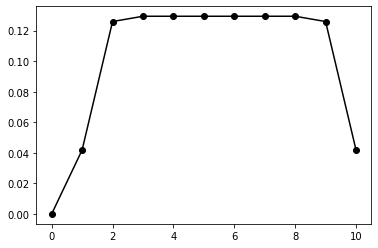

In [9]:
from sklearn.linear_model import Ridge
# Math outcomes
X_train, X_test, y_train, y_test = train_test_split(mostObs_pred, mostObs_MathOutc, test_size=0.20, random_state = 649)
rr_acc = []
pot_alphas = [1e100, 1e10, 1e5, 0.01, 0.1, 1, 10, 100, 1000, 100000, 10000000000]
for i in pot_alphas:
    rr = Ridge(alpha=i)
    rr.fit(X_train, y_train)
    pred_train_rr= rr.predict(X_train)
    pred_test_rr= rr.predict(X_test)
    r_2 = r2_score(y_test, pred_test_rr)
    rr_acc.append(r_2)
plt.plot(rr_acc, marker='o', color='black')
print("Max R^2:", max(rr_acc))

Max R^2: 0.12491556558016081


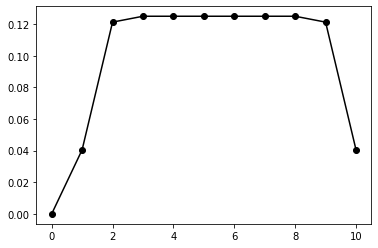

In [10]:
# Reading outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostObs_pred, mostObs_ReadOutc, test_size=0.20, random_state = 649)
rr_acc = []
pot_alphas = [1e100, 1e10, 1e5, 0.01, 0.1, 1, 10, 100, 1000, 100000, 10000000000]
for i in pot_alphas:
    rr = Ridge(alpha=i)
    rr.fit(X_train, y_train)
    pred_train_rr= rr.predict(X_train)
    pred_test_rr= rr.predict(X_test)
    r_2 = r2_score(y_test, pred_test_rr)
    rr_acc.append(r_2)
plt.plot(rr_acc, marker='o', color='black')
print("Max R^2:", max(rr_acc))

### LASSO Regression

/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2570658594.82605, tolerance: 10415783.602323852
  positive)
/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41693906.949783325, tolerance: 10415783.602323852
  positive)


Max R^2: 0.12945173941331123


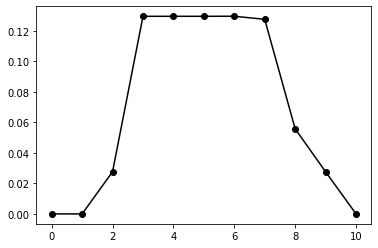

In [11]:
from sklearn.linear_model import Lasso
# Math Outcomes
X_train, X_test, y_train, y_test = train_test_split(mostObs_pred, mostObs_MathOutc, test_size=0.20, random_state = 649)
lasso_acc = []
pot_alphas = [1e100, 1e10, 1e5, 0.01, 0.1, 1, 10, 100, 1000, 100000, 10000000000]
for i in pot_alphas:
    model_lasso = Lasso(alpha=i)
    model_lasso.fit(X_train, y_train) 
    pred_train_lasso= model_lasso.predict(X_train)
    pred_test_lasso= model_lasso.predict(X_test)
    r_2 = r2_score(y_test, pred_test_lasso)
    lasso_acc.append(r_2)
plt.plot(lasso_acc, marker='o', color='black')
print("Max R^2:", max(lasso_acc))

/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3670867188.1591034, tolerance: 12045490.996649519
  positive)
/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63196061.257507324, tolerance: 12045490.996649519
  positive)


Max R^2: 0.12494822245407178


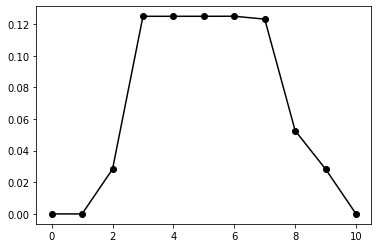

In [12]:
# Reading Outcomes
X_train, X_test, y_train, y_test = train_test_split(mostObs_pred, mostObs_ReadOutc, test_size=0.20, random_state = 649)
lasso_acc = []
pot_alphas = [1e100, 1e10, 1e5, 0.01, 0.1, 1, 10, 100, 1000, 100000, 10000000000]
for i in pot_alphas:
    model_lasso = Lasso(alpha=i)
    model_lasso.fit(X_train, y_train) 
    pred_train_lasso= model_lasso.predict(X_train)
    pred_test_lasso= model_lasso.predict(X_test)
    r_2 = r2_score(y_test, pred_test_lasso)
    lasso_acc.append(r_2)
plt.plot(lasso_acc, marker='o', color='black')
print("Max R^2:", max(lasso_acc))

### Elastic Net

/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6622393333.361473, tolerance: 10415783.602323852
  positive)
/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129998888.73777771, tolerance: 10415783.602323852
  positive)


Max R^2: 0.12943142314600542


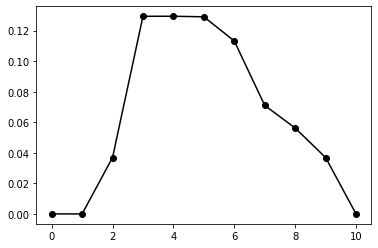

In [13]:
from sklearn.linear_model import ElasticNet
# Math outcomes
X_train, X_test, y_train, y_test = train_test_split(mostObs_pred, mostObs_MathOutc, test_size=0.20, random_state = 649)
elst_acc = []
pot_alphas = [1e100, 1e10, 1e5, 0.01, 0.1, 1, 10, 100, 1000, 100000, 10000000000]
for i in pot_alphas:
    model_enet = ElasticNet(alpha = i)
    model_enet.fit(X_train, y_train) 
    pred_train_enet= model_enet.predict(X_train)
    pred_test_enet= model_enet.predict(X_test)
    r_2 = r2_score(y_test, pred_test_enet)
    elst_acc.append(r_2)
plt.plot(elst_acc, marker='o', color='black')
print("Max R^2:", max(elst_acc))

/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9084501527.262642, tolerance: 12045490.996649519
  positive)
/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196518007.78157043, tolerance: 12045490.996649519
  positive)


Max R^2: 0.12491682364117374


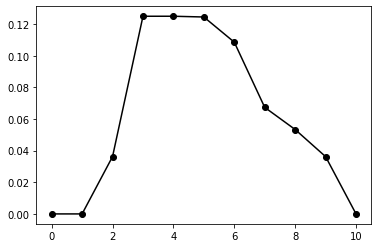

In [14]:
# Reading Outcomes
X_train, X_test, y_train, y_test = train_test_split(mostObs_pred, mostObs_ReadOutc, test_size=0.20, random_state = 649)
elst_acc = []
pot_alphas = [1e100, 1e10, 1e5, 0.01, 0.1, 1, 10, 100, 1000, 100000, 10000000000]
for i in pot_alphas:
    model_enet = ElasticNet(alpha = i)
    model_enet.fit(X_train, y_train) 
    pred_train_enet= model_enet.predict(X_train)
    pred_test_enet= model_enet.predict(X_test)
    r_2 = r2_score(y_test, pred_test_enet)
    elst_acc.append(r_2)
plt.plot(elst_acc, marker='o', color='black')
print("Max R^2:", max(elst_acc))

### K-Nearest Neighbor

Highest R^2: 0.7044871939683189


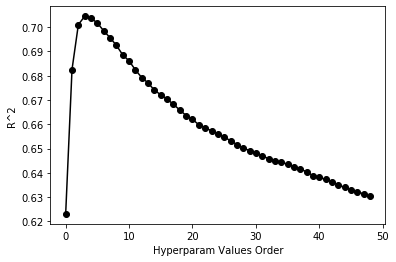

In [15]:
from sklearn.neighbors import KNeighborsRegressor
# Math outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostObs_pred, mostObs_MathOutc, test_size=0.20, random_state = 649)
r2_vals = []
neighbors = list(range(1, 50))
for i in neighbors:
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    score = r2_score(y_test, y_pred)
    r2_vals.append(score)
line_plot(r2_vals)


Highest R^2: 0.6898742162012275


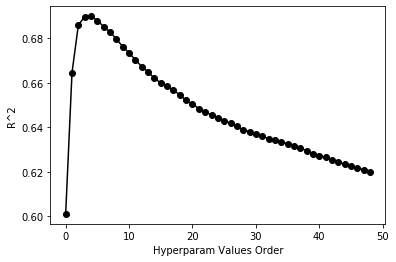

In [16]:
# Reading outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostObs_pred, mostObs_ReadOutc, test_size=0.20, random_state = 649)
r2_vals = []
neighbors = list(range(1, 50))
for i in neighbors:
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    score = r2_score(y_test, y_pred)
    r2_vals.append(score)
line_plot(r2_vals)

### Support Vector Regressor

Highest R^2: -0.3895084029795466


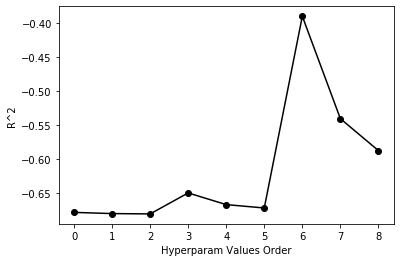

In [22]:
from sklearn.svm import SVR
# Math outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostObs_pred, mostObs_MathOutc, test_size=0.20, random_state = 649)
r2_vals = []
gamma_range = [0.01, 0.1, 1]
C_range = [1, 10, 100]
for i in C_range:
    for k in gamma_range:
        svr_rbf = SVR(kernel='rbf', C=i, gamma=k, epsilon=0.01)
        svr_rbf.fit(X_train, y_train)
        y_pred = svr_rbf.predict(X_test)
        score = r2_score(y_test, y_pred)
        r2_vals.append(score)
line_plot(r2_vals)

Highest R^2: -0.4014384667255029


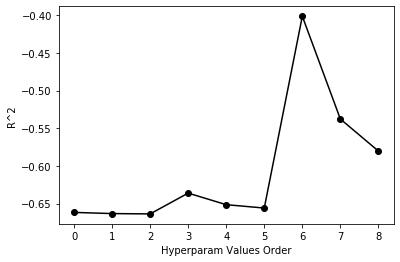

In [24]:
# Reading outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostObs_pred, mostObs_ReadOutc, test_size=0.20, random_state = 649)
r2_vals = []
gamma_range = [0.01, 0.1, 1]
C_range = [1, 10, 100]
for i in C_range:
    for k in gamma_range:
        svr_rbf = SVR(kernel='rbf', C=i, gamma=k, epsilon=0.01)
        svr_rbf.fit(X_train, y_train)
        y_pred = svr_rbf.predict(X_test)
        score = r2_score(y_test, y_pred)
        r2_vals.append(score)
line_plot(r2_vals)

## Predicting outcomes for using the 'most features' df. 

### Ridge Regression

R^2: 0.3229840681794376


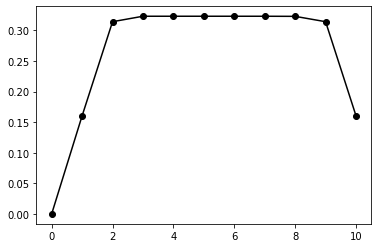

In [17]:
from sklearn.linear_model import Ridge
# Math outcomes
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
rr_acc = []
pot_alphas = [1e100, 1e10, 1e5, 0.01, 0.1, 1, 10, 100, 1000, 100000, 10000000000]
for i in pot_alphas:
    rr = Ridge(alpha=i)
    rr.fit(X_train, y_train)
    pred_train_rr= rr.predict(X_train)
    pred_test_rr= rr.predict(X_test)
    r_2 = r2_score(y_test, pred_test_rr)
    rr_acc.append(r_2)
plt.plot(rr_acc, marker='o', color='black')
print("R^2:", max(rr_acc))

R^2: 0.42572219722694116


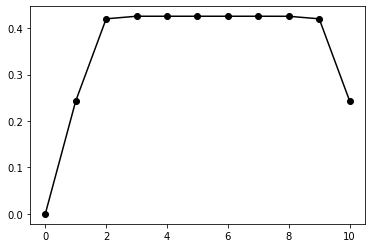

In [18]:
# Reading outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
rr_acc = []
pot_alphas = [1e100, 1e10, 1e5, 0.01, 0.1, 1, 10, 100, 1000, 100000, 10000000000]
for i in pot_alphas:
    rr = Ridge(alpha=i)
    rr.fit(X_train, y_train)
    pred_train_rr= rr.predict(X_train)
    pred_test_rr= rr.predict(X_test)
    r_2 = r2_score(y_test, pred_test_rr)
    rr_acc.append(r_2)
plt.plot(rr_acc, marker='o', color='black')
print("R^2:", max(rr_acc))

### LASSO Regression

R^2: 0.3229838694937406


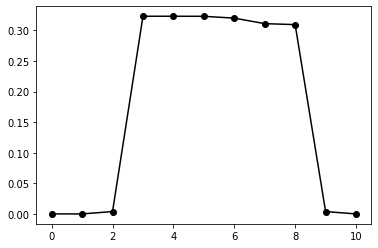

In [19]:
from sklearn.linear_model import Lasso
# Math Outcomes
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
lasso_acc = []
pot_alphas = [1e100, 1e10, 1e5, 0.01, 0.1, 1, 10, 100, 1000, 100000, 10000000000]
for i in pot_alphas:
    model_lasso = Lasso(alpha=i)
    model_lasso.fit(X_train, y_train) 
    pred_train_lasso= model_lasso.predict(X_train)
    pred_test_lasso= model_lasso.predict(X_test)
    r_2 = r2_score(y_test, pred_test_lasso)
    lasso_acc.append(r_2)
plt.plot(lasso_acc, marker='o', color='black')
print("R^2:", max(lasso_acc))

R^2: 0.4257216120275169


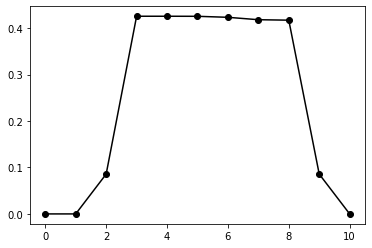

In [20]:
# Reading Outcomes
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
lasso_acc = []
pot_alphas = [1e100, 1e10, 1e5, 0.01, 0.1, 1, 10, 100, 1000, 100000, 10000000000]
for i in pot_alphas:
    model_lasso = Lasso(alpha=i)
    model_lasso.fit(X_train, y_train) 
    pred_train_lasso= model_lasso.predict(X_train)
    pred_test_lasso= model_lasso.predict(X_test)
    r_2 = r2_score(y_test, pred_test_lasso)
    lasso_acc.append(r_2)
plt.plot(lasso_acc, marker='o', color='black')
print("R^2:", max(lasso_acc))

### Elastic Net

R^2: 0.3229667281812816


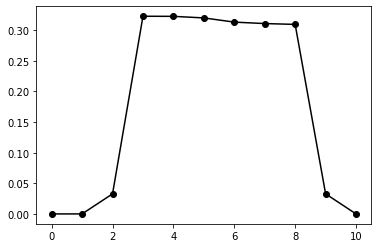

In [21]:
from sklearn.linear_model import ElasticNet
# Math outcomes
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
elst_acc = []
pot_alphas = [1e100, 1e10, 1e5, 0.01, 0.1, 1, 10, 100, 1000, 100000, 10000000000]
for i in pot_alphas:
    model_enet = ElasticNet(alpha = i)
    model_enet.fit(X_train, y_train) 
    pred_train_enet= model_enet.predict(X_train)
    pred_test_enet= model_enet.predict(X_test)
    r_2 = r2_score(y_test, pred_test_enet)
    elst_acc.append(r_2)
plt.plot(elst_acc, marker='o', color='black')
print("R^2:", max(elst_acc))

R^2: 0.4257142616431


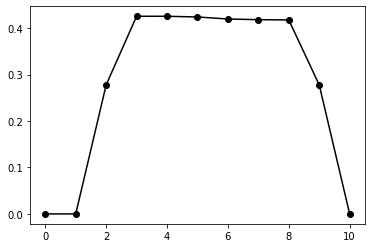

In [22]:
# Reading outcomes
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
elst_acc = []
pot_alphas = [1e100, 1e10, 1e5, 0.01, 0.1, 1, 10, 100, 1000, 100000, 10000000000]
for i in pot_alphas:
    model_enet = ElasticNet(alpha = i)
    model_enet.fit(X_train, y_train) 
    pred_train_enet= model_enet.predict(X_train)
    pred_test_enet= model_enet.predict(X_test)
    r_2 = r2_score(y_test, pred_test_enet)
    elst_acc.append(r_2)
plt.plot(elst_acc, marker='o', color='black')
print("R^2:", max(elst_acc))

### K-Nearest Neighbor

Highest R^2: 0.7520271558379724


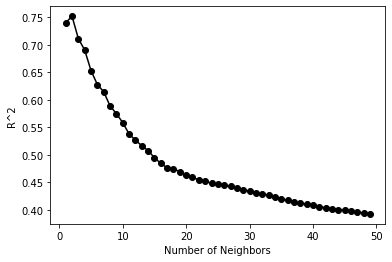

In [23]:
from sklearn.neighbors import KNeighborsRegressor
# Math outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
r2_vals = []
neighbors = list(range(1, 50))
for i in neighbors:
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    score = r2_score(y_test, y_pred)
    r2_vals.append(score)
plt.plot(neighbors, r2_vals, marker='o', color='black')
plt.xlabel('Number of Neighbors')
plt.ylabel('R^2')
print("Highest R^2:", max(r2_vals))

In [ ]:
# Math outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
neighbors = list(range(1, 50))
for i in neighbors:
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    score = r2_score(y_test, y_pred)
    r2_vals.append(score)
plt.plot(neighbors, r2_vals, marker='o', color='black')
plt.xlabel('Number of Neighbors')
plt.ylabel('R^2')
print("Highest R^2:", max(r2_vals))

Highest R^2: 0.8120433606436155


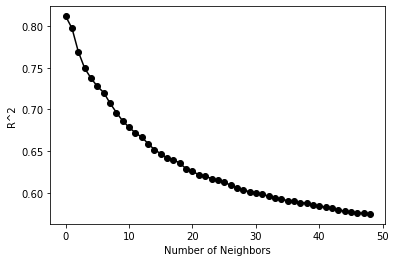

In [24]:
# Reading outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
r2_vals = []
neighbors = list(range(1, 50))
for i in neighbors:
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    score = r2_score(y_test, y_pred)
    r2_vals.append(score)
plt.plot(r2_vals, marker='o', color='black')
plt.xlabel('Number of Neighbors')
plt.ylabel('R^2')
print("Highest R^2:", max(r2_vals))

### Support Vector Regression

Highest R^2: -0.006196439007751353


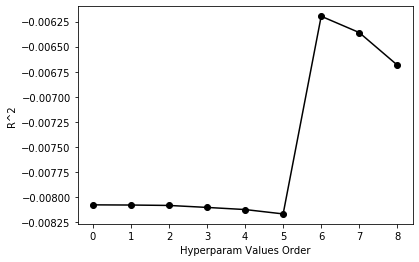

In [32]:
from sklearn.svm import SVR
# Math outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
r2_vals = []
gamma_range = [0.01, 0.1, 1]
C_range = [1, 10, 100]
for i in C_range:
    for k in gamma_range:
        svr_rbf = SVR(kernel='rbf', C=i, gamma=k, epsilon=0.01)
        svr_rbf.fit(X_train, y_train)
        y_pred = svr_rbf.predict(X_test)
        score = r2_score(y_test, y_pred)
        r2_vals.append(score)
line_plot(r2_vals)

Highest R^2: -0.034070631213271474


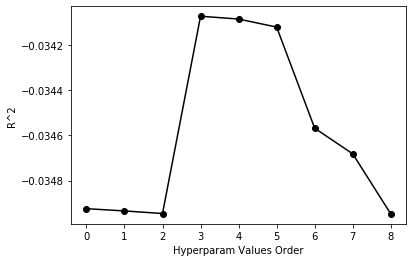

In [33]:
# Reading outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
r2_vals = []
gamma_range = [0.01, 0.1, 1]
C_range = [1, 10, 100]
for i in C_range:
    for k in gamma_range:
        svr_rbf = SVR(kernel='rbf', C=i, gamma=k, epsilon=0.01)
        svr_rbf.fit(X_train, y_train)
        y_pred = svr_rbf.predict(X_test)
        score = r2_score(y_test, y_pred)
        r2_vals.append(score)
line_plot(r2_vals)